# <font color=purple> Machine Learning

<font color=purple> **The objective of this project is twofold: to delve into the study of machine learning libraries while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a many dataset and offers a range of exercises involving those datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About


Let's imagine that we own a credit card company, and what would be the risk that customers have of delaying payment of their bills?

We can use this information for future business decisions, for example. To understand this risk, we have three categories: low, medium, and high.

In the context of machine learning, we use some classification techniques that will tell us which category a specific customer fits into and solve this problem for us.

Let's ask another question: What is the behavior of customers with the credit card? Not just the risk of late payment.

Previously, we had three options: low risk, medium risk, and high risk. Now, we want to know about behavior, and in this case, we don't have categories. We could classify it as "bad" or "good," but even then it wouldn't be interesting enough.

Obviously, we can't analyze each of the customers separately, after all, the idea is that we know that a specific group of customers has a certain behavior, and based on that, we can make decisions and apply some business rules.

So, we want to know this behavior based on customer data regarding credit card usage. Therefore, it's not as specific and punctual as knowing the risk of delaying a bill, but rather something more generic.

That's why the proposal is to group customers with similar characteristics so that members of the same group have similar behaviors in credit card usage, even if we don't yet know what they are.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn imports

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

# Dataset

url_1 = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'

# Readers

data_1 = pd.read_csv(url_1)

In [2]:
# Checking dataset

data_1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Removing desnecessary columns

data_1 = data_1.drop(columns = ['CUST_ID', 'TENURE'])
data_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [4]:
# Checking null values

missing = data_1.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
# Fill null values

data_1 = data_1.fillna(data_1.median())
missing = data_1.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [6]:
# Normalizing values

values = Normalizer().fit_transform(data_1.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [7]:
# Clustering

kmeans = KMeans(n_clusters=5, n_init=10, max_iter = 300)
y_predict = kmeans.fit_predict(values)

In [8]:
# Calculating validation with silhoutte

# The values range from -1 to 1, with closer proximity to 1 indicating better performance.

labels = kmeans.labels_
silhoutte = metrics.silhouette_score(values, labels, metric='euclidean')
silhoutte

0.3486361382475878

In [9]:
# Calculating Davies-Bouldin

# In the case of the Davies-Bouldin metric, the closer the value is to 0, the better.

dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1526565665992343

In [10]:
# Calculating Calinski

# The metric is considered better when the values are higher.

calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.8431338804794

In [11]:
# Creating function to change number of clusters

def cluster_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
# Checking for 3 clusters

s_1, dbs_1, calinski_1 = cluster_algorithm(3, values)
print(s_1, dbs_1, calinski_1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [13]:
# Checking for 5 clusters

s_2, dbs_2, calinski_2 = cluster_algorithm(5, values)
print(s_2, dbs_2, calinski_2)

0.3644845919974304 1.0757138590613293 3431.79374284143


In [14]:
# Checking for 10 clusters

s_3, dbs_3, calinski_3 = cluster_algorithm(20, values)
print(s_3, dbs_3, calinski_3)

0.29336505965743026 1.2206538895638324 2404.373788043317


In [15]:
# Creating random numbers for testing

random_data = np.random.rand(8950, 16)
s_random, dbs_random, calinski_random = cluster_algorithm(5, random_data)
print(s_random, dbs_random, calinski_random)
print(s_2, dbs_2, calinski_2)

# This validates that our metrics are better than random ones

0.039319253350000506 3.5753120306054837 301.3991812983701
0.3644845919974304 1.0757138590613293 3431.79374284143


In [16]:
# Validating cluster stablity

set_1, set_2, set_3 = np.array_split(values, 3)
s_s1, dbs_s1, calinski_s1 = cluster_algorithm(5, set_1)
s_s2, dbs_s2, calinski_s2 = cluster_algorithm(5, set_2)
s_s3, dbs_s3, calinski_s3 = cluster_algorithm(5, set_3)

print(s_s1, dbs_s1, calinski_s1)
print(s_s2, dbs_s2, calinski_s2)
print(s_s3, dbs_s3, calinski_s3)

# This valdiates that our cluster is valid

0.36908155221853267 1.0580445685596032 1204.0558494933452
0.3532183246410258 1.142940860955218 1194.9401425417566
0.3668447506189662 1.0992311388359746 1167.532949291058


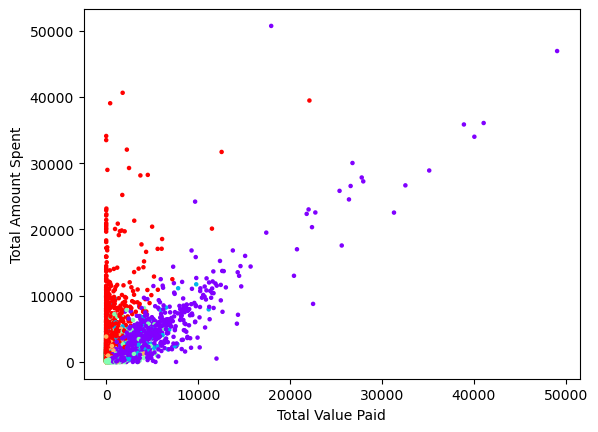

In [17]:
# Plotting using 2 variables

plt.scatter(data_1.PURCHASES, data_1.PAYMENTS, c=labels, s=5, cmap='rainbow')
plt.xlabel('Total Value Paid')
plt.ylabel('Total Amount Spent')
plt.show()

# In this visualization, two clusters are evident:

# - The orange cluster represents clients who spend money but haven't paid.
# - The purple cluster represents clients who have paid their expenses.

In [19]:
# Checking informations based on cluster column

data_1['cluster'] = labels
data_1.groupby('cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        1494.0  1118.998658  1627.007380    0.000000   212.520398   
1        1825.0  2949.582558  2565.494710  114.523682  1216.893766   
2        3315.0   488.802028   936.433585    0.000000    24.078900   
3        1315.0  2719.616192  2230.337145    1.691842  1035.647960   
4        1001.0  1748.854674  1987.975020    0.000000   486.170360   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         543.237203  1337.212684  19043.138560            1494.0  0.931343   
1        1843.308668  4021.881912  18495.558550            1825.0  0.996860   
2          85.881798   448.965814   9630.367575            3315.0  0.780972   
3        2080.312991  3782.283750  12856.152510            1315.0  0.906890   
4        1060.422892  2241.092286  14581.459140            1001.0  0.858535   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       531.787024  18621.013310           1494.0  0.282392   
1        ...      1961.161822  76406.207520           1825.0  0.001062   
2        ...       260.172137   3933.230932           3315.0  0.244951   
3        ...      1164.174894   8644.138069           1315.0  0.007450   
4        ...       931.105425  21235.065300           1001.0  0.129974   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.369194  0.0  0.0  0.083333  0.567461  1.000000  
1        0.013400  0.0  0.0  0.000000  0.000000  0.416667  
2        0.345886  0.0  0.0  0.000000  0.436507  1.000000  
3        0.041141  0.0  0.0  0.000000  0.000000  0.600000  
4        0.198876  0.0  0.0  0.083333  0.166667  1.000000  

[5 rows x 128 columns]

In [22]:
# Checking centroids

centroids = kmeans.cluster_centers_
centroids

array([[1.55441288e-01, 2.45527380e-04, 4.45197805e-01, 2.57865614e-01,
        1.87505775e-01, 2.67051319e-02, 2.04941957e-04, 8.80988885e-05,
        1.51947090e-04, 9.54095447e-06, 1.73998170e-04, 6.18672007e-03,
        5.94079088e-01, 4.02613545e-01, 9.25336034e-02, 7.27583477e-05],
       [5.34687210e-01, 3.07650208e-04, 9.40629597e-02, 4.50945616e-02,
        4.90836013e-02, 8.40386909e-02, 1.03622694e-04, 3.29090827e-05,
        7.70582927e-05, 3.86156491e-05, 6.69712678e-04, 2.24253925e-03,
        6.47433252e-01, 1.99966849e-01, 3.11387835e-01, 2.85888844e-07],
       [7.41435057e-02, 2.30598606e-04, 1.22644337e-01, 4.91336388e-02,
        7.36112623e-02, 2.02012160e-02, 1.72105136e-04, 3.41056055e-05,
        1.39398511e-04, 7.56585643e-06, 1.18718703e-04, 2.87194118e-03,
        9.43090102e-01, 1.54954100e-01, 5.72048927e-02, 7.55013476e-05],
       [3.92487569e-01, 2.21860804e-04, 4.09098804e-02, 2.41007933e-02,
        1.68131725e-02, 4.69520034e-01, 4.57363938e-05, 1.599

In [35]:
# Checking variance from centroids

max = len(centroids[0])
for i in range(max):
    print(data_1.columns.values[i], "{:.4f}".format( centroids[:, i].var()))

BALANCE 0.0276
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0219
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0037
CASH_ADVANCE 0.0350
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0210
PAYMENTS 0.0348
MINIMUM_PAYMENTS 0.0078
PRC_FULL_PAYMENT 0.0000


# Selected Attributes

BALANCE 
0.0276

PURCHASES 
0.0219

CASH_ADVANCE 
0.0350

CREDIT_LIMIT 
0.0210

PAYMENTS 
0.0348

In [33]:
# Checking info about selected attributes

description = data_1.groupby('cluster')[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1118.998658  3328.438133    186.010928   4044.718977  3050.885706   
1        2949.582558   559.479945    573.495675   3730.000000  1050.324877   
2         488.802028   640.242015    126.097601   5178.415315   827.711487   
3        2719.616192   251.530144   3004.448265   4782.091255  1008.915227   
4        1748.854674   531.250120   3064.439069   3914.956256  4961.223005   

         n_clients  
cluster             
0             1494  
1             1825  
2             3315  
3             1315  
4             1001  


CLUSTER:0 - Clients that spend more on purchases. Best payers. 

CLUSTER:1 - Highest spending amounts. Worst payers.

CLUSTER:2 - Clients that spend less with the highest credit limit.  Good Payers. Highest clients number

CLUSTER:3 - Clients that spend more and their focus is withdrawal. Bad payers.

CLUSTER:4 - Clients that spend the most on withdrawals. Lowest clients number.